In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

billboard_hot_100 = pd.read_csv("billboard_hot_100.csv")
billboard_hot_100["first_day_of_the_week"] = pd.to_datetime(billboard_hot_100["first_day_of_the_week"],
                                                            infer_datetime_format=True)

In [9]:
billboard_hot_100.dtypes

Unnamed: 0                        int64
first_day_of_the_week    datetime64[ns]
artist                           object
song_name                        object
position                          int64
last_week_position              float64
peak_position                     int64
weeks_on_chart                    int64
songwriters                      object
producers                        object
promotion_label                  object
dtype: object

In [10]:
billboard_hot_100["year"] = billboard_hot_100["first_day_of_the_week"].dt.year

billboard_hot_100.head()

,Unnamed: 0,first_day_of_the_week,artist,song_name,position,last_week_position,peak_position,weeks_on_chart,songwriters,producers,promotion_label,year
0,0,1958-09-08,Domenico Modugno,Nel Blu Dipinto Di Blu (Volare),1,1.0,1,6,"F.Migliacci, D.Modugno",Not Listed,Decca,1958
1,1,1958-09-08,The Elegants,Little Star,2,2.0,1,6,"V.Picone, A.Venosa",Not Listed,Apt,1958
2,2,1958-09-08,The Everly Brothers,Bird Dog,3,3.0,3,6,B.Bryant,Not Listed,Cadence,1958
3,3,1958-09-08,Jimmy Clanton And His Rockets,Just A Dream,4,4.0,4,6,Not Listed,Not Listed,Ace,1958
4,4,1958-09-08,Perez Prado And His Orchestra,Patricia,5,6.0,2,6,"B.Marcus, P.Prado",Not Listed,RCA Victor,1958


## Song lifetime on chart

### By week

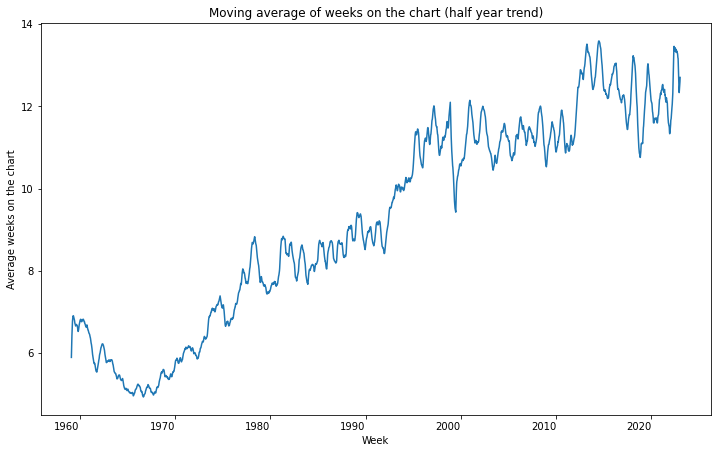

<Figure size 432x288 with 0 Axes>

In [11]:
import matplotlib.dates as mdates

avg_weeks_on_chart = billboard_hot_100[["first_day_of_the_week", "weeks_on_chart"]].groupby(
    by="first_day_of_the_week").mean().rolling(window=30).mean()

avg_weeks_on_chart_plot = avg_weeks_on_chart.plot(kind='line', figsize=(12, 8), legend=False, rot=0)
plt.title("Moving average of weeks on the chart (half year trend)")
plt.xlabel("Week")
plt.ylabel("Average weeks on the chart")

plt.savefig("figures/average_weeks_on_chart.pdf", format="pdf")#, bbox_inches="tight")
plt.show()

### By year

In [12]:
max_weeks_on_chart_yearly = billboard_hot_100[["weeks_on_chart", "year"]]
avg_week_on_chart_yearly = billboard_hot_100[["weeks_on_chart", "year"]].groupby(by="year").mean().rolling(window=30).mean()

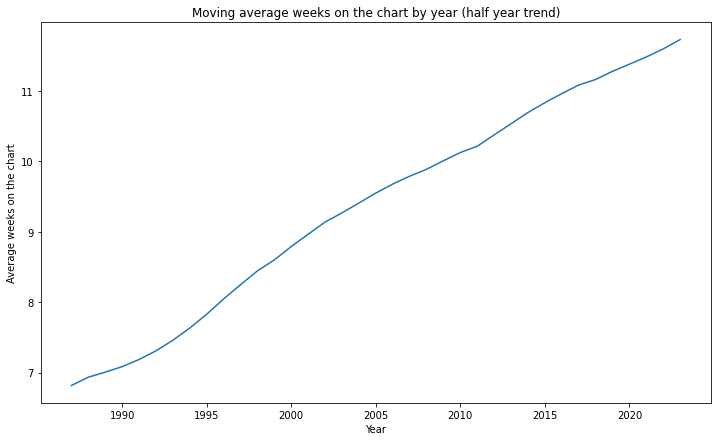

<Figure size 432x288 with 0 Axes>

In [13]:
avg_weeks_on_chart_plot_yearly = avg_week_on_chart_yearly.plot(kind='line', figsize=(12, 7), legend=False)

plt.title("Moving average weeks on the chart by year (half year trend)")
plt.xlabel("Year")
plt.ylabel("Average weeks on the chart")

plt.savefig("figures/average_weeks_on_chart_yearly.pdf", format="pdf")
plt.show()

### Top 20 weekly

In [14]:
top_20_weekly = billboard_hot_100[["first_day_of_the_week",
                                   "position", "weeks_on_chart"]][billboard_hot_100["position"] <= 20].sort_values(by=[
                                                                "first_day_of_the_week", "weeks_on_chart"]).groupby(
                                                                by=["first_day_of_the_week"]).head(20)

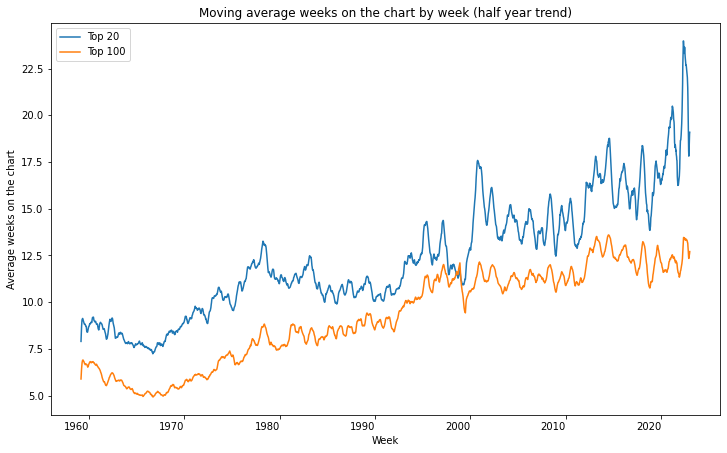

<Figure size 432x288 with 0 Axes>

In [15]:
top_20_on_chart_avg = top_20_weekly[["first_day_of_the_week", "weeks_on_chart"]].groupby(
    by="first_day_of_the_week").mean().rolling(window=30).mean()

top_20_on_chart_avg_plot = top_20_on_chart_avg.plot(kind='line', figsize=(12, 8), legend=False, rot=0)
avg_weeks_on_chart.plot(kind='line', figsize=(12, 8), legend=False, rot=0, ax=top_20_on_chart_avg_plot)

plt.title("Moving average weeks on the chart by week (half year trend)")
plt.xlabel("Week")
plt.ylabel("Average weeks on the chart")
plt.legend(["Top 20", "Top 100"])

plt.savefig("figures/average_weeks_on_chart_20_100.pdf", format="pdf")
plt.show()

## Distribution of lifetime of the songs

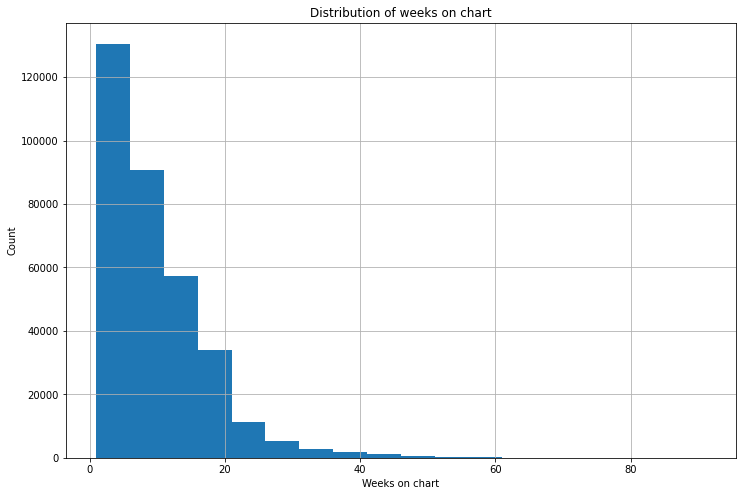

<Figure size 432x288 with 0 Axes>

In [16]:
weeks_on_chart_counts = billboard_hot_100["weeks_on_chart"]#.value_counts()

# choosing bin size: https://en.wikipedia.org/wiki/Histogram#Number_of_bins_and_width
weeks_on_chart_counts.hist(bins=18, figsize=(12, 8), legend=False)
plt.title("Distribution of weeks on chart")
plt.xlabel("Weeks on chart")
plt.ylabel("Count")

plt.savefig("figures/lifetime_of_songs_distribution.pdf", format="pdf")
plt.show()

## New songs on the charts

### By week

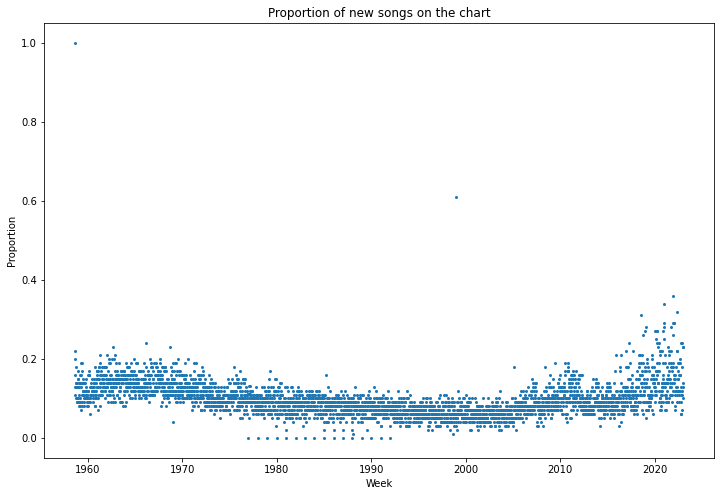

<Figure size 432x288 with 0 Axes>

In [17]:
billboard_hot_100["new_song"] = billboard_hot_100["last_week_position"].map(
    lambda position: True if np.isnan(position) else False)

cross_tab_songs = billboard_hot_100[["first_day_of_the_week", "new_song"]].groupby(
    by="first_day_of_the_week").mean().reset_index()
cross_tab_songs.plot(kind="scatter", figsize=(12, 8), legend=False, rot=0, x="first_day_of_the_week", y="new_song", s=4)

plt.title("Proportion of new songs on the chart")
plt.xlabel("Week")
plt.ylabel("Proportion")

plt.savefig("figures/proportion_of_new_songs.pdf", format="pdf")
plt.show()

### By year

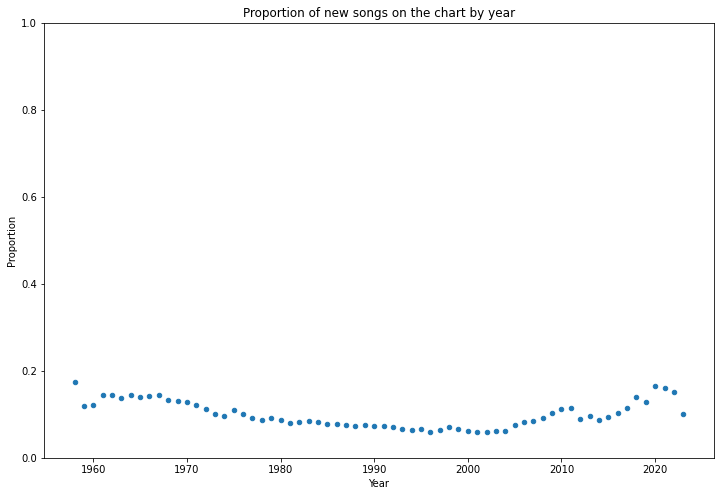

<Figure size 432x288 with 0 Axes>

In [18]:
cross_tab_songs_yearly = billboard_hot_100[["year", "new_song"]].groupby(by="year").mean().reset_index()
cross_tab_songs_yearly.plot(kind="scatter", figsize=(12, 8), legend=False, rot=0, x="year", y="new_song")

plt.title("Proportion of new songs on the chart by year")
plt.xlabel("Year")
plt.ylabel("Proportion")
plt.ylim([0, 1])

plt.savefig("figures/proportion_of_new_songs_yearly.pdf", format="pdf")
plt.show()

## Weekly differences in positions

In [19]:
def calculate_position_change(position, last_week_position):
    if np.isnan(last_week_position):
        return 0
    if position > last_week_position:
        return 1
    return 0

billboard_hot_100["position_rised"] = billboard_hot_100.apply(
    lambda x: calculate_position_change(x["position"], x["last_week_position"]), axis=1)

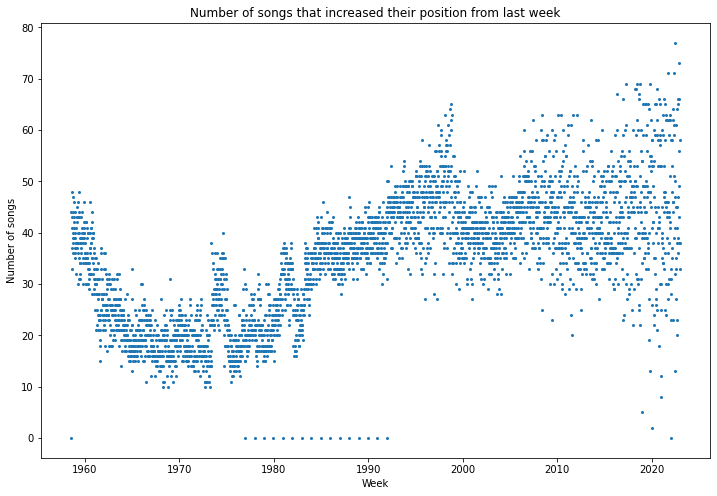

<Figure size 432x288 with 0 Axes>

In [20]:
count_rises = billboard_hot_100[["position_rised", "first_day_of_the_week"]].groupby(
    by="first_day_of_the_week").sum().reset_index()

count_rises.plot(kind="scatter", figsize=(12, 8), x="first_day_of_the_week", y="position_rised", s=4)

plt.title("Number of songs that increased their position from last week")
plt.xlabel("Week")
plt.ylabel("Number of songs")

plt.savefig("figures/number_of_songs_rised.pdf", format="pdf")
plt.show()

In [21]:
def calculate_position_difference(position, last_week_position):
    if np.isnan(last_week_position):
        return position
    return position - last_week_position

billboard_hot_100["position_change"] = billboard_hot_100.apply(
    lambda x: calculate_position_difference(x["position"], x["last_week_position"]), axis=1)

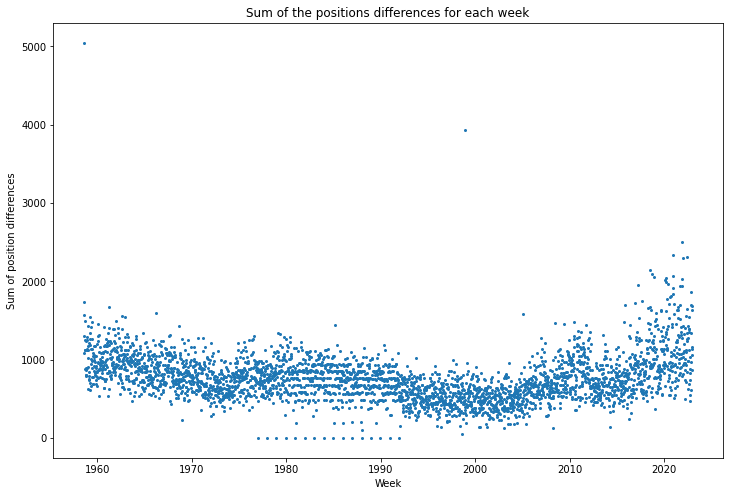

<Figure size 432x288 with 0 Axes>

In [22]:
count_changes = billboard_hot_100[["position_change", "first_day_of_the_week"]].groupby(
    by="first_day_of_the_week").sum().reset_index()

count_changes.plot(kind='scatter', figsize=(12, 8), legend=False, rot=0, x="first_day_of_the_week", y="position_change", s=4)

plt.title("Sum of the positions differences for each week")
plt.xlabel("Week")
plt.ylabel("Sum of position differences")

plt.savefig("figures/sum_of_position_changes.pdf", format="pdf")
plt.show()

## Positions difference distributions

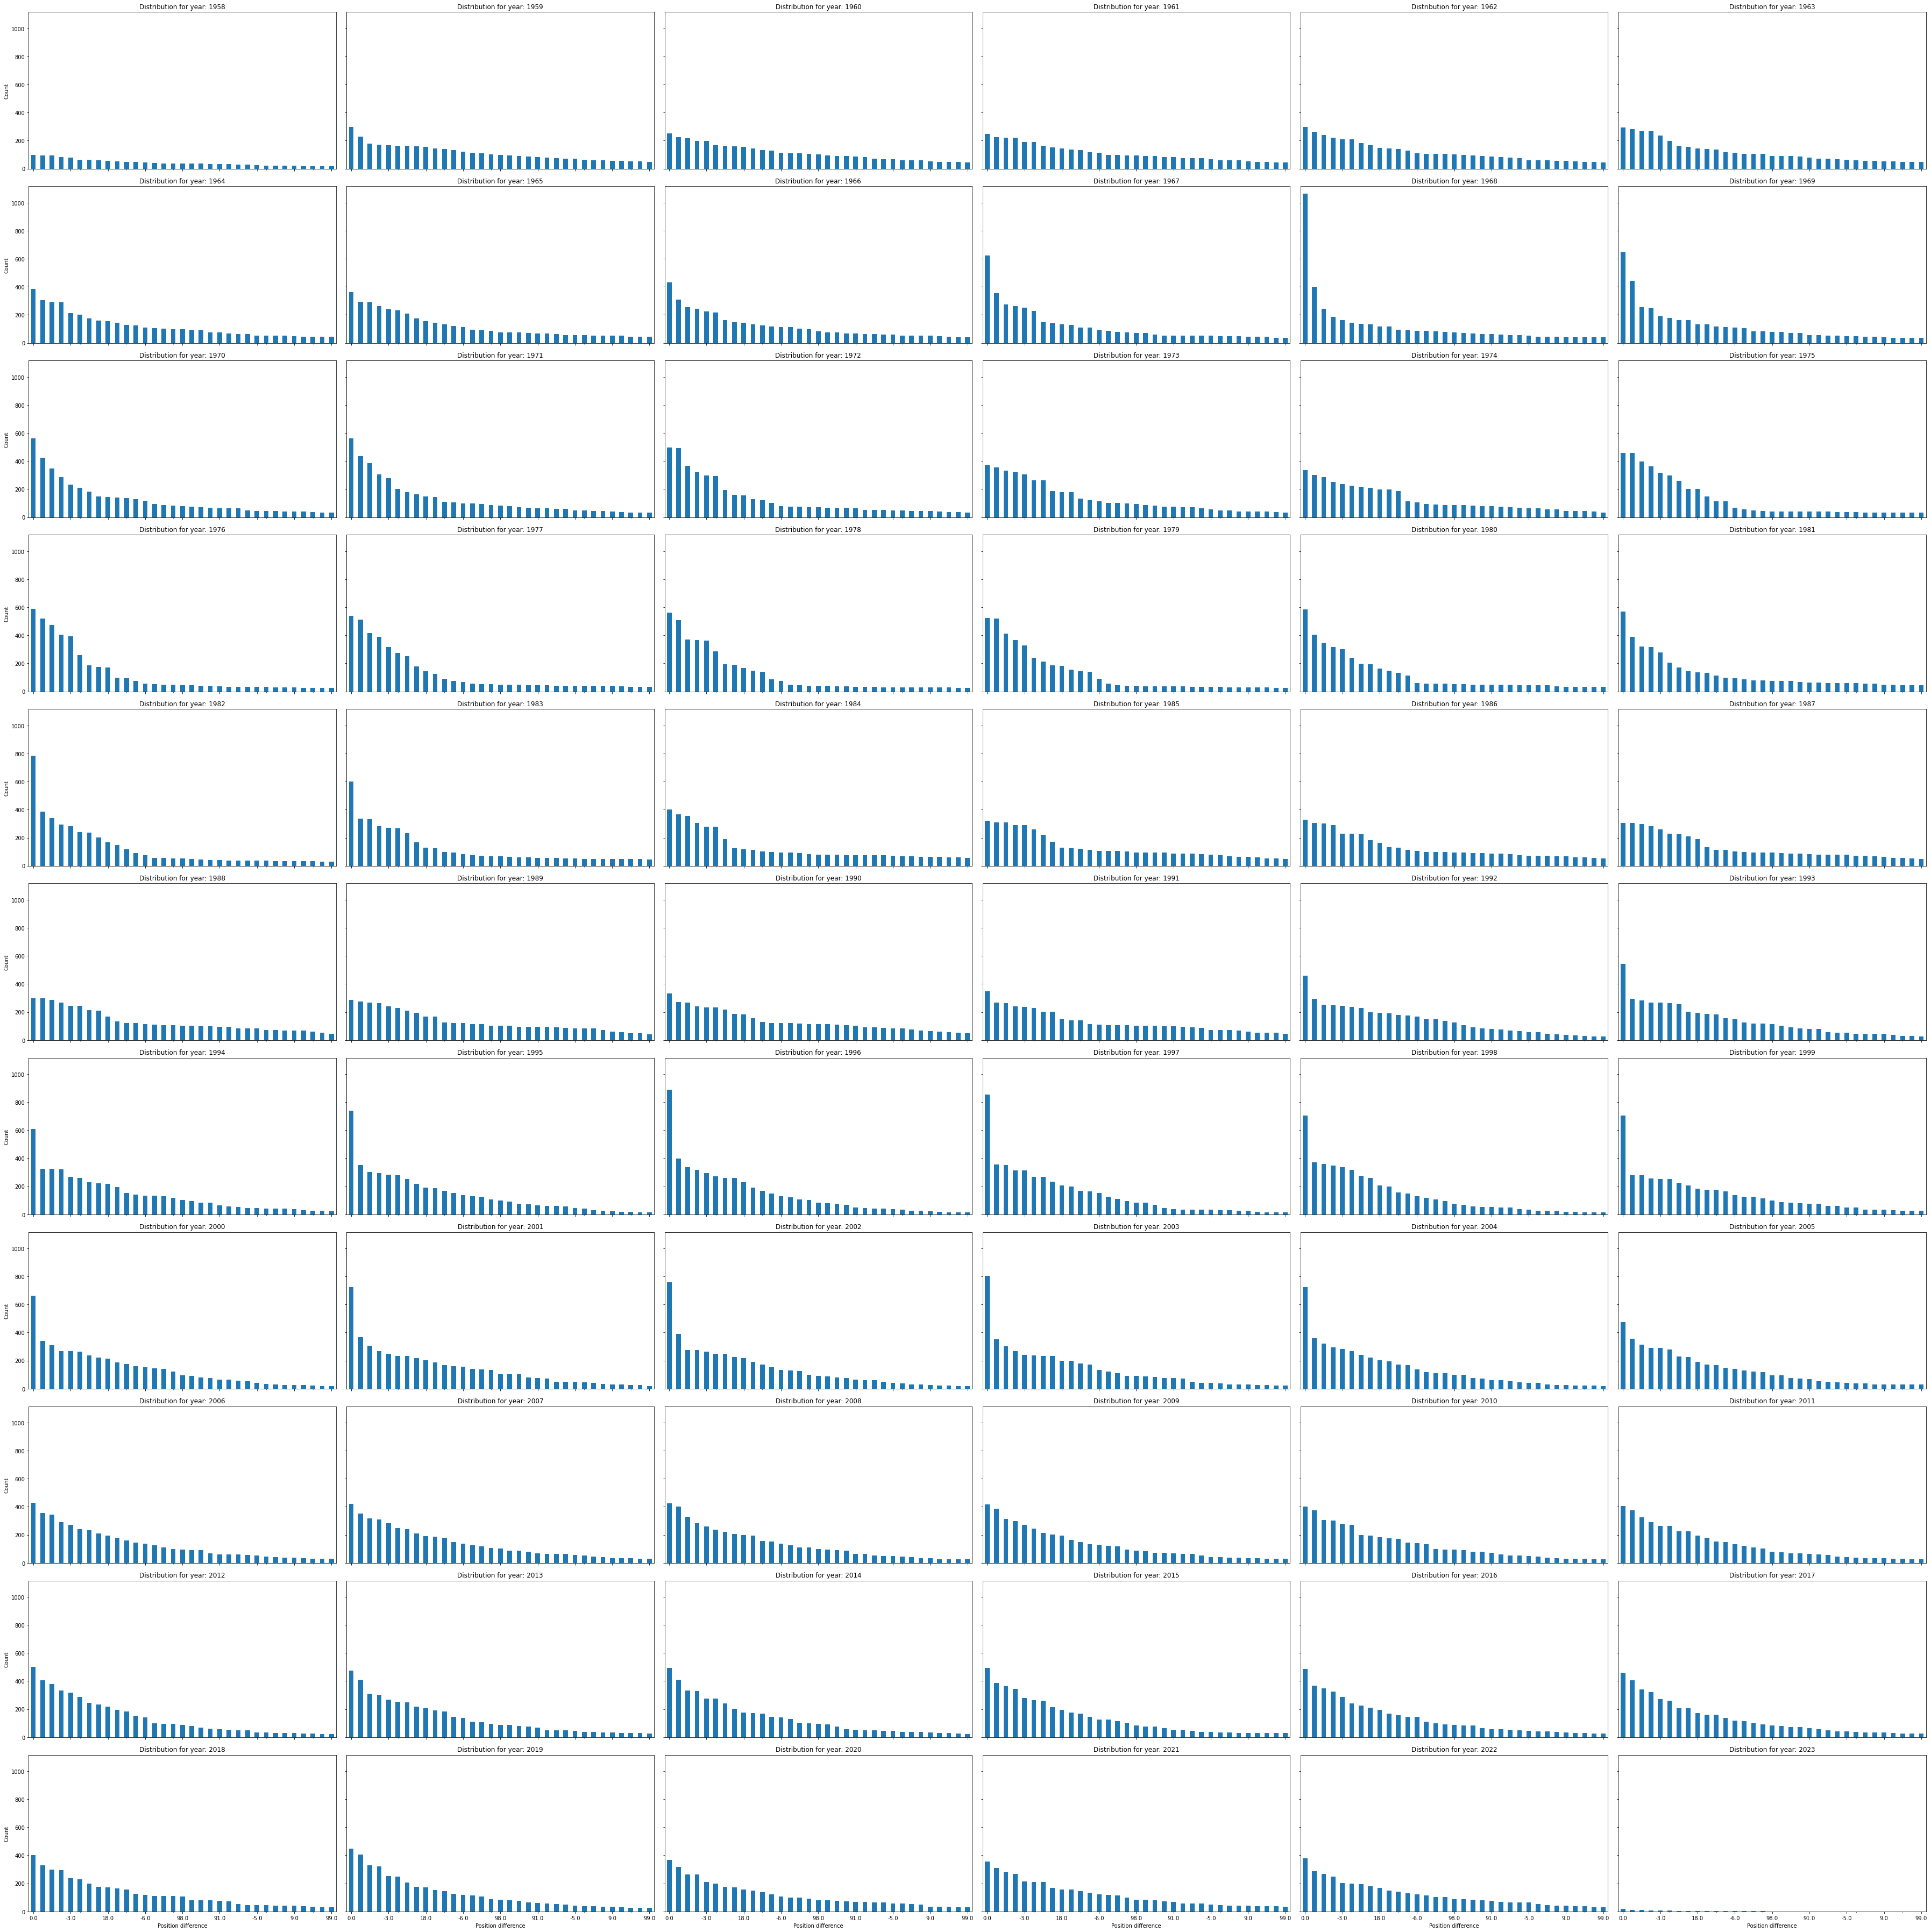

<Figure size 432x288 with 0 Axes>

In [23]:
fig, axes = plt.subplots(11, 6, figsize=(50, 50), sharex=True, sharey=True)

row = 0
col = 0
for year in range(1958, 2024):
    count_changes = billboard_hot_100[billboard_hot_100["year"] == year]["position_change"].value_counts()
    count_changes.plot(kind='bar', legend=False, rot=0, ax=axes[row, col])
    axes[row, col].set_title(f"Distribution for year: {year}")
    axes[row, col].set_xlabel("Position difference")
    axes[row, col].set_ylabel("Count")
    col += 1
    if col == 6:
        col = 0
        row += 1

plt.locator_params(axis='x', nbins=10)
plt.tight_layout()

plt.savefig("figures/position_difference_distribution.pdf", format="pdf")
plt.show()

## Best perfoming songs

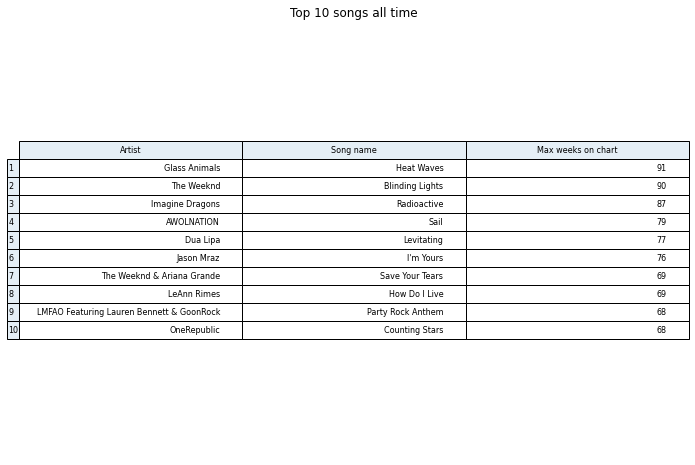

<Figure size 432x288 with 0 Axes>

In [24]:
# Top 10 best berforming songs ever

max_weeks_on_chart = billboard_hot_100[["artist", "song_name", "weeks_on_chart"]].groupby(
    by=["artist", "song_name"]).max()
max_weeks_on_chart_sorted = max_weeks_on_chart.sort_values(by="weeks_on_chart", ascending=False).reset_index()

top_10_all_time = max_weeks_on_chart_sorted.head(10)
#max_weeks_on_chart_sorted.head(10).style

plt.figure(figsize=(12, 8))

# https://towardsdatascience.com/simple-little-tables-with-matplotlib-9780ef5d0bc4
rcolors = plt.cm.BuPu(np.full(10, 0.1))
ccolors = plt.cm.BuPu(np.full(10, 0.1))

table = plt.table(cellText=top_10_all_time.values,
                 rowColours=rcolors,
                 colColours=ccolors,
                 rowLabels=range(1, 11),
                 colLabels=["Artist", "Song name", "Max weeks on chart"],
                 loc = "center")
table.scale(1, 1.5)
plt.title("Top 10 songs all time")
plt.axis("off")

plt.savefig("figures/top_10_songs.pdf", format="pdf")
plt.show()

## Best performing songs before 2018

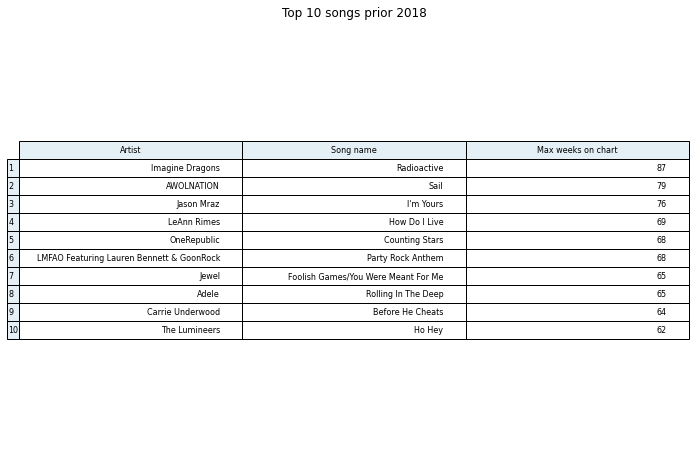

<Figure size 432x288 with 0 Axes>

In [25]:
max_weeks_on_chart_prior_2018 = billboard_hot_100[billboard_hot_100["year"] < 2018][[
    "artist", "song_name", "weeks_on_chart"]].groupby(by=["artist", "song_name"]).max()
max_weeks_on_chart_prior_2018_sorted = max_weeks_on_chart_prior_2018.sort_values(
    by="weeks_on_chart", ascending=False).reset_index()

top_10_prior_2018 = max_weeks_on_chart_prior_2018_sorted.head(10)

plt.figure(figsize=(12, 8))
table = plt.table(cellText=top_10_prior_2018.values,
                 rowColours=rcolors,
                 colColours=ccolors,
                 rowLabels=range(1, 11),
                 colLabels=["Artist", "Song name", "Max weeks on chart"],
                 loc = "center")
table.scale(1, 1.5)
plt.title("Top 10 songs prior 2018")
plt.axis("off")

plt.savefig("figures/top_10_prior_2018.pdf", format="pdf")
plt.show()

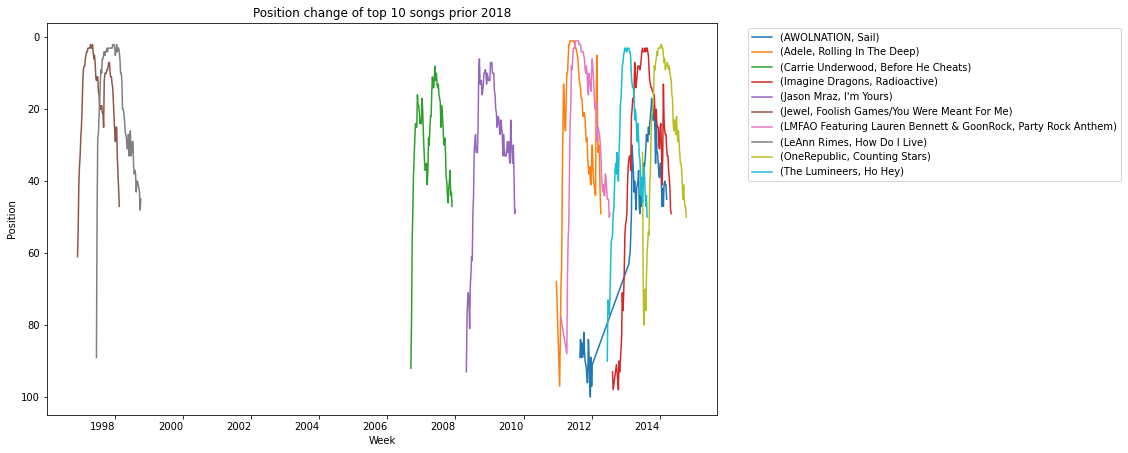

<Figure size 432x288 with 0 Axes>

In [26]:
top_10_prior_2018_positions = billboard_hot_100[["artist", "song_name", "first_day_of_the_week", "position"]][
    billboard_hot_100["artist"].isin(top_10_prior_2018["artist"]) & \
    billboard_hot_100["song_name"].isin(top_10_prior_2018["song_name"])]

top_10_prior_2018_positions.set_index("first_day_of_the_week", inplace=True)

top_10_prior_2018_positions.groupby(by=["artist", "song_name"])["position"].plot(
    kind="line", figsize=(12, 8), legend=True, rot=0, )

plt.gca().invert_yaxis()
plt.title("Position change of top 10 songs prior 2018")
plt.xlabel("Week")
plt.ylabel("Position")
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")

plt.savefig("figures/top_10_prior_2018_positions.pdf", format="pdf")
plt.show()

## Best performing songs since 2018

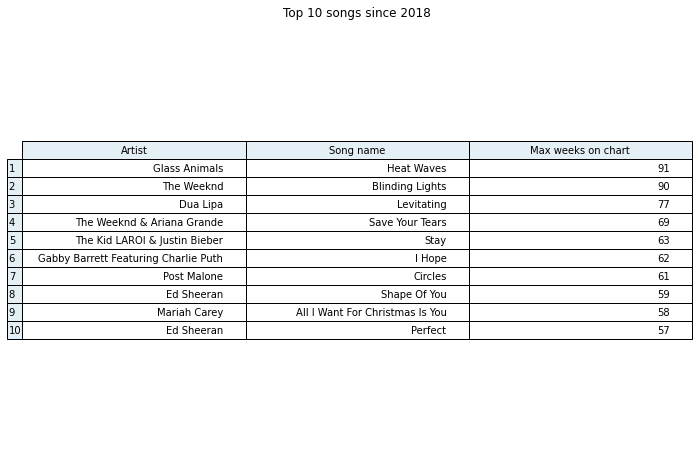

<Figure size 432x288 with 0 Axes>

In [27]:
max_weeks_on_chart_after_2018 = billboard_hot_100[billboard_hot_100["year"] >= 2018][[
    "artist", "song_name", "weeks_on_chart"]].groupby(by=["artist", "song_name"]).max()
max_weeks_on_chart_after_2018_sorted = max_weeks_on_chart_after_2018.sort_values(
    by="weeks_on_chart", ascending=False).reset_index()

top_10_after_2018 = max_weeks_on_chart_after_2018_sorted.head(10)

plt.figure(figsize=(12, 8))
table = plt.table(cellText=top_10_after_2018.values,
                 rowColours=rcolors,
                 colColours=ccolors,
                 rowLabels=range(1, 11),
                 colLabels=["Artist", "Song name", "Max weeks on chart"],
                 loc = "center")
table.scale(1, 1.5)
plt.title("Top 10 songs since 2018")
plt.axis("off")

plt.savefig("figures/top_10_since_2018.pdf", format="pdf")
plt.show()

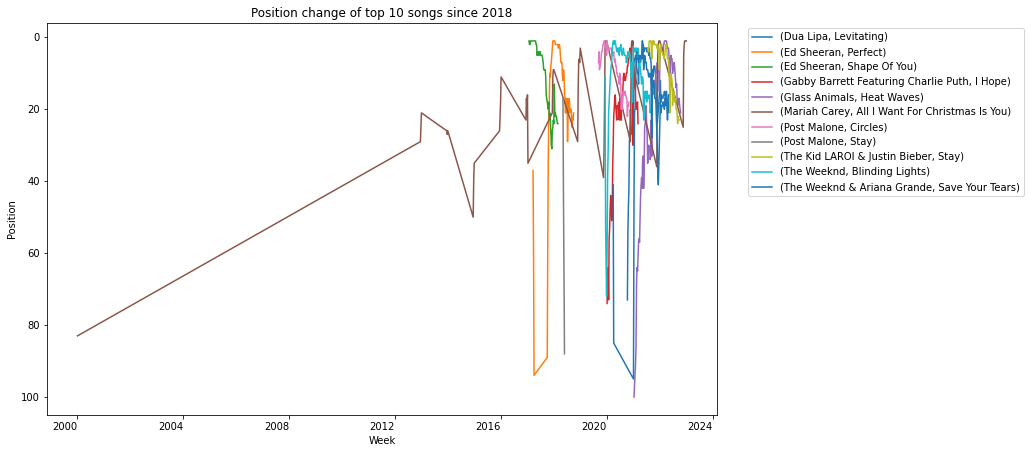

<Figure size 432x288 with 0 Axes>

In [28]:
top_10_after_2018_positions = billboard_hot_100[["artist", "song_name", "first_day_of_the_week", "position"]][
    billboard_hot_100["artist"].isin(top_10_after_2018["artist"]) & \
    billboard_hot_100["song_name"].isin(top_10_after_2018["song_name"])]

top_10_after_2018_positions.set_index("first_day_of_the_week", inplace=True)

top_10_after_2018_positions.groupby(by=["artist", "song_name"])["position"].plot(
    kind="line", figsize=(12, 8), legend=True, rot=0, )

plt.gca().invert_yaxis()
plt.title("Position change of top 10 songs since 2018")
plt.xlabel("Week")
plt.ylabel("Position")
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()
plt.savefig("figures/top_10_since_2018_positions.pdf", format="pdf")

## Best songwriters based on the number of songs on the charts

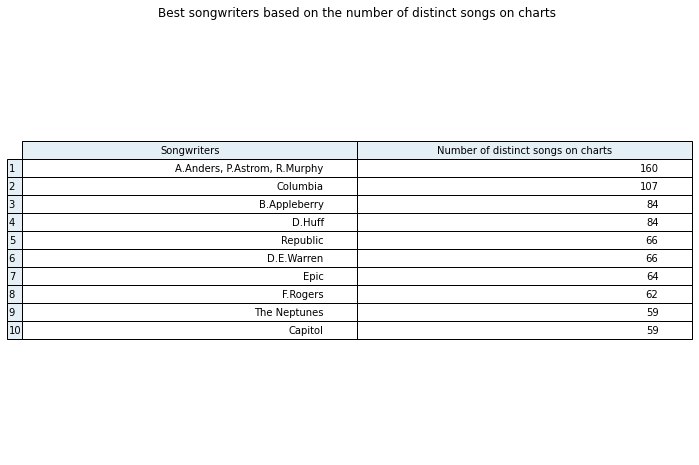

<Figure size 432x288 with 0 Axes>

In [29]:
songs_with_songwriters = billboard_hot_100[billboard_hot_100["songwriters"] != "Not Listed"]

songwriters_songs_count = songs_with_songwriters.groupby(by=["songwriters", "artist", "song_name"]).size().groupby(
    by="songwriters").count().sort_values(ascending=False).reset_index(name="songs_count")

best_songwriters = songwriters_songs_count.head(10)

plt.figure(figsize=(12, 8))
table = plt.table(cellText=best_songwriters.values,
                 rowColours=rcolors,
                 colColours=ccolors,
                 rowLabels=range(1, 11),
                 colLabels=["Songwriters", "Number of distinct songs on charts"],
                 loc = "center")
table.scale(1, 1.5)
plt.title("Best songwriters based on the number of distinct songs on charts")
plt.axis("off")
plt.show()
plt.savefig("figures/best_songwriters_songs.pdf", format="pdf")

## Best songwriters based on the number of distinct artists that make it to the charts

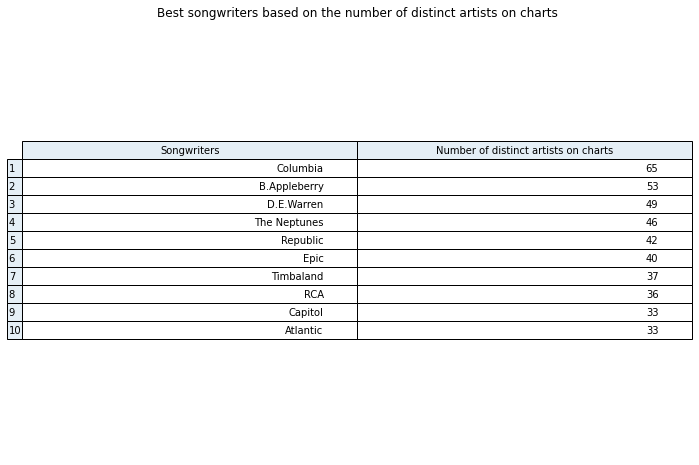

<Figure size 432x288 with 0 Axes>

In [30]:
songwriters_artists_count = songs_with_songwriters.groupby(by=["songwriters", "artist"]).size().groupby(
    by="songwriters").count().sort_values(ascending=False).reset_index(name="songs_count")

best_songwriters_artists = songwriters_artists_count.head(10)

plt.figure(figsize=(12, 8))
table = plt.table(cellText=best_songwriters_artists.values,
                 rowColours=rcolors,
                 colColours=ccolors,
                 rowLabels=range(1, 11),
                 colLabels=["Songwriters", "Number of distinct artists on charts"],
                 loc = "center")
table.scale(1, 1.5)
plt.title("Best songwriters based on the number of distinct artists on charts")
plt.axis("off")
plt.show()
plt.savefig("figures/best_songwriters_artists.pdf", format="pdf")